# Ambiental Radioactivity by M. Green - Chain 40K
In this notebook, we analyse the events contained in the root file by Matt Green about ambiental radioactivity of Thorium. He said that they simulated the full **40K-chain**.

## File: `A40_Z19` (*i.e Potassium's decay chain*)
Explaination of the name: A=40, Z=19 is **40K**, an isotope of Potassium. 
The name suggests to contain the simulation of the full 40K-chain.

In [1]:
import pandas as pd
import os

# Since input file is large, we have to distribute the workload
filepath1 = os.path.join("..", "Data", "output_AmbRad_A40_Z19_100000_part1.csv")
filepath2 = os.path.join("..", "Data", "output_AmbRad_A40_Z19_100000_part2.csv")
filepath3 = os.path.join("..", "Data", "output_AmbRad_A40_Z19_100000_part3.csv")
# create multiple dataframes
df1 = pd.read_csv(filepath1, index_col=False)
df2 = pd.read_csv(filepath2, index_col=False)
df3 = pd.read_csv(filepath3, index_col=False)
# concatenate the dfs in a single one and force the mem release
df = pd.concat([df1, df2, df3], ignore_index=True)
del df1
del df2
del df3

## Atoms involved in this simulation.

In [2]:
sorted(df.PID.unique())

[-11, 11, 22, 1000180400, 1000190400, 1000320740, 1000320760]

These are:
- `PID=-11, 11, 22` positrons, electrons, photons
- `PID=1000180400` Argon isotope 40Ar
- `PID=1000190400` Potassium isotope 40K
- `PID=1000320740, 1000320760` Germanium isotopes 74Ge and 76Ge

## Energy depositions
**Note** that since (*probably*) there are cuts on particles, the energy deposition in the next analysis is only a partial description of the real energy deposition.

In [3]:
edep_entries = df[df.energydeposition>0].energydeposition.reset_index()
edep_gby_event = df.groupby("eventnumber").energydeposition.sum().reset_index()
edep_gby_event.columns = ['eventnumber', 'cum_edep']    # to distinguish

pd.DataFrame([edep_entries.energydeposition.describe(), edep_gby_event.cum_edep.describe()])

,count,mean,std,min,25%,50%,75%,max
energydeposition,2604967.0,0.019218,0.024127,3.645580e-11,0.001457,0.013623,0.025305,0.440091
cum_edep,72751.0,0.688139,0.401004,5.324440e-06,0.387522,0.622416,0.898767,1.463986


In [4]:
del edep_entries
del edep_gby_event

The deposited energy is very low, in the order of few units (keV or MeV???).

**Questions**:
1. What are the units used in MC out scheme (*Edep is keV? Time is ns?*)? Maybe Giuseppe and Danila can recognize the units...

## Time distribution

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 18})

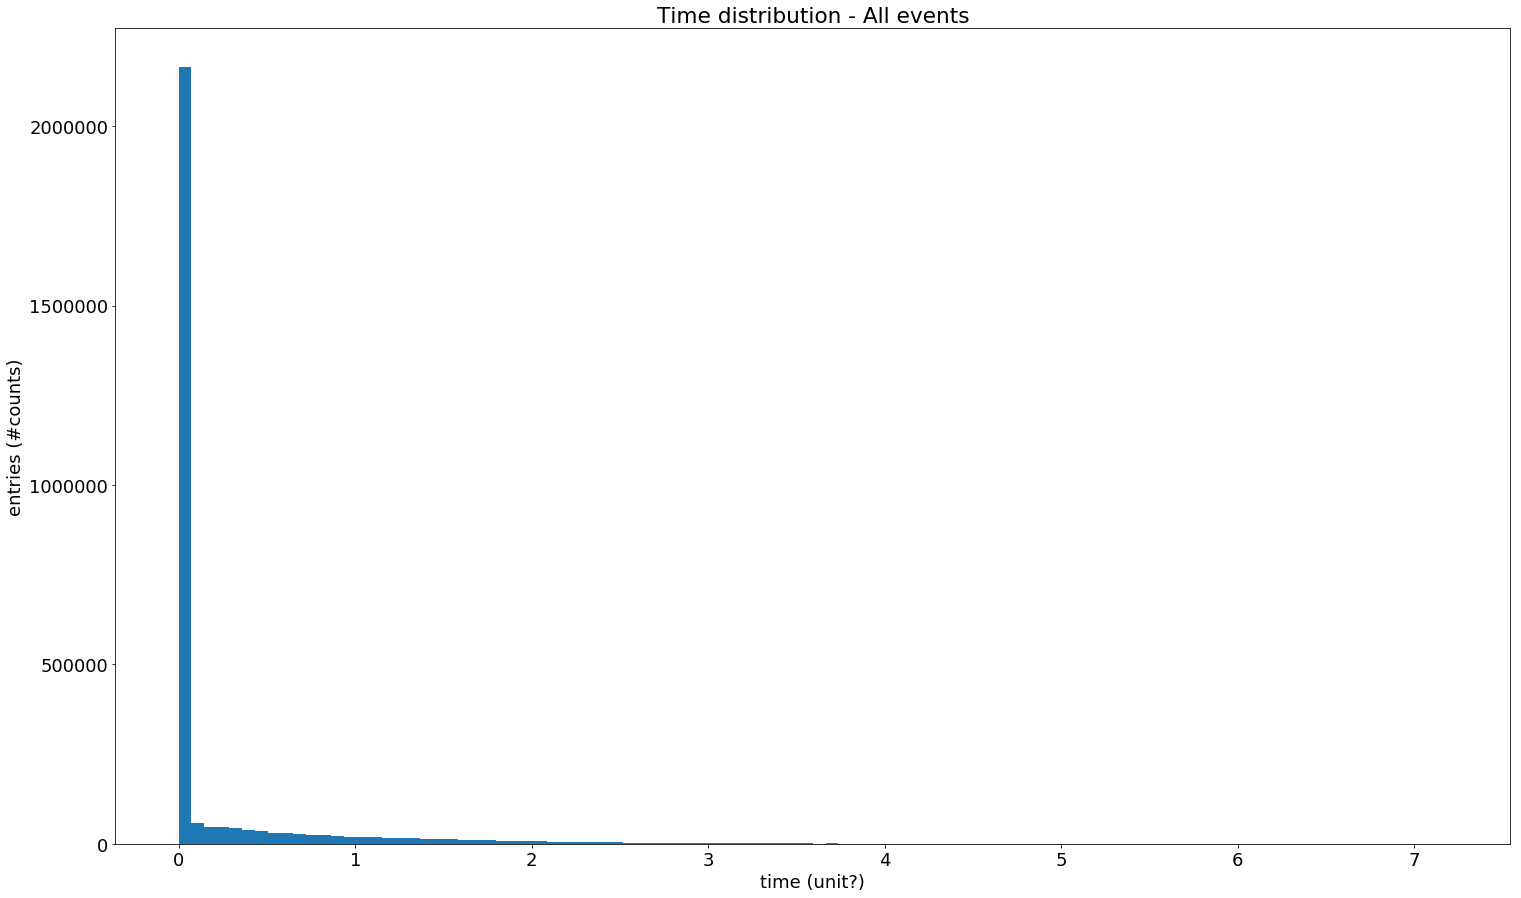

In [7]:
fig, ax = plt.subplots()
ax.hist(df.time, 100)
ax.set_title("Time distribution - All events")
ax.set_xlabel("time (unit?)")
ax.set_ylabel("entries (#counts)")
plt.show()

## Space distribution
### All entries

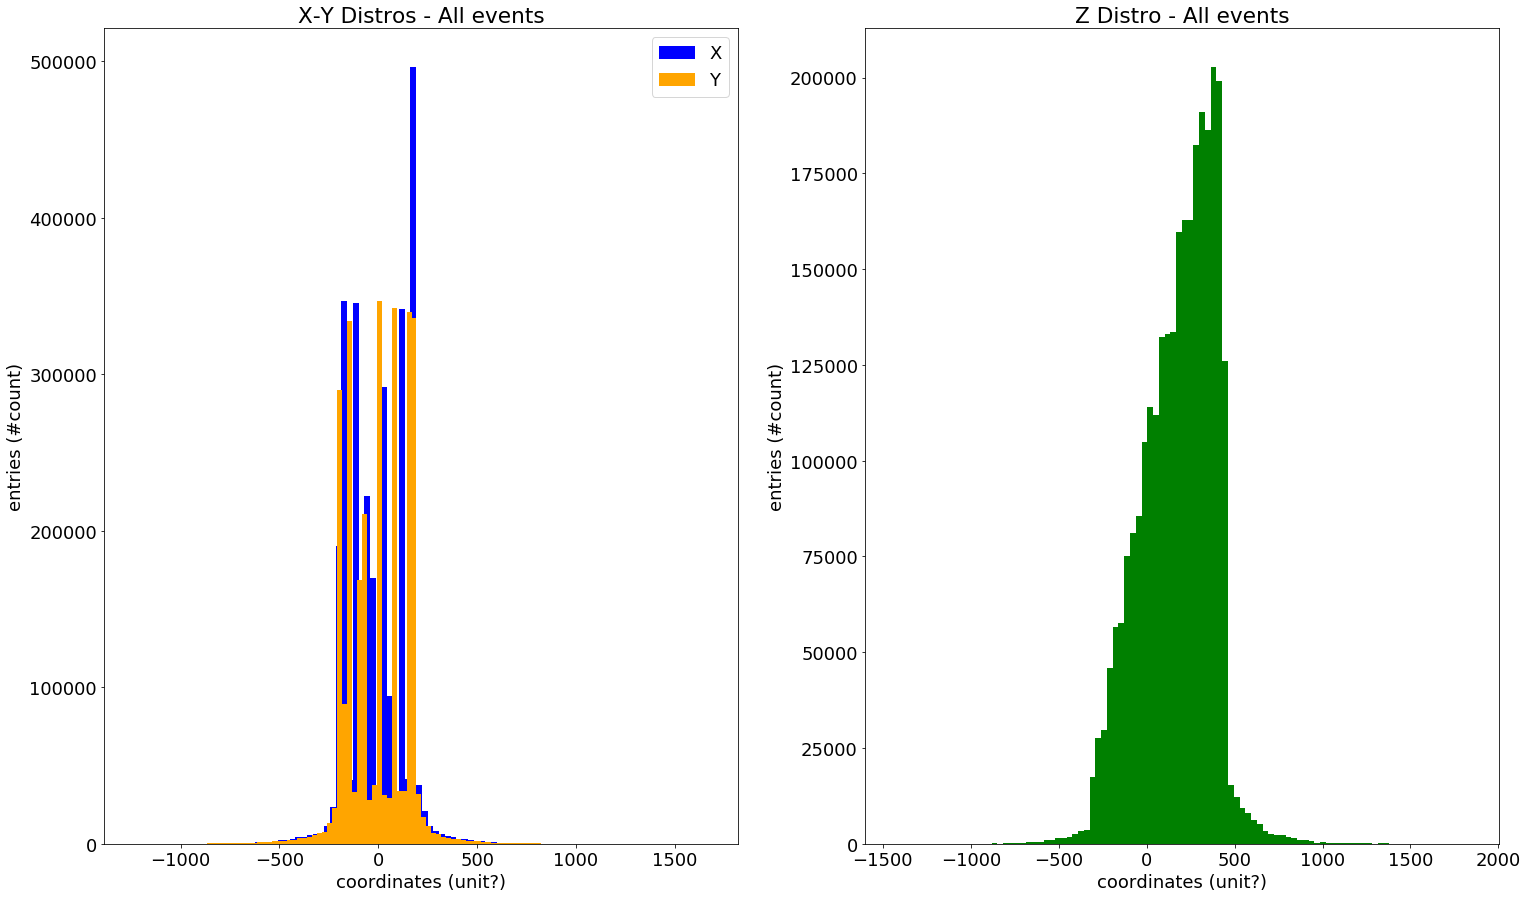

,x,y,z
count,2.874722e+06,2.874722e+06,2.874722e+06
mean,-7.929465e-02,-9.326717e-01,1.818180e+02
std,1.552911e+02,1.545498e+02,2.090280e+02
min,-1.233160e+03,-1.241650e+03,-1.438190e+03
25%,-1.219160e+02,-1.461660e+02,3.779178e+01
50%,-4.838370e+00,-4.835415e-02,2.109650e+02
75%,1.218770e+02,1.460770e+02,3.441990e+02
max,1.674380e+03,1.276200e+03,1.839200e+03


In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
nbins = 100
ax1.hist(df.x, nbins, label='X', color='b')
ax1.hist(df.y, nbins, label='Y', color='orange')
ax2.hist(df.z, nbins, label='Z', color='g')
ax1.set_title("X-Y Distros - All events")
ax2.set_title("Z Distro - All events")
ax1.set_xlabel("coordinates (unit?)")
ax2.set_xlabel("coordinates (unit?)")
ax1.set_ylabel("entries (#count)")
ax2.set_ylabel("entries (#count)")
ax1.legend()
plt.show()

pd.DataFrame(df[["x", "y", "z"]].describe())

#### Observations:
- The space distribution ranges in the whole LAr volume (*x, y, z in ~[-1950, +1950]*).
- We can see a greater focus around the origin.


**Questions:** 
1. The sampling x, y, z is *uniform*? Maybe they defined a sensitive area to write only entries around the ROI.

### Only Primary events

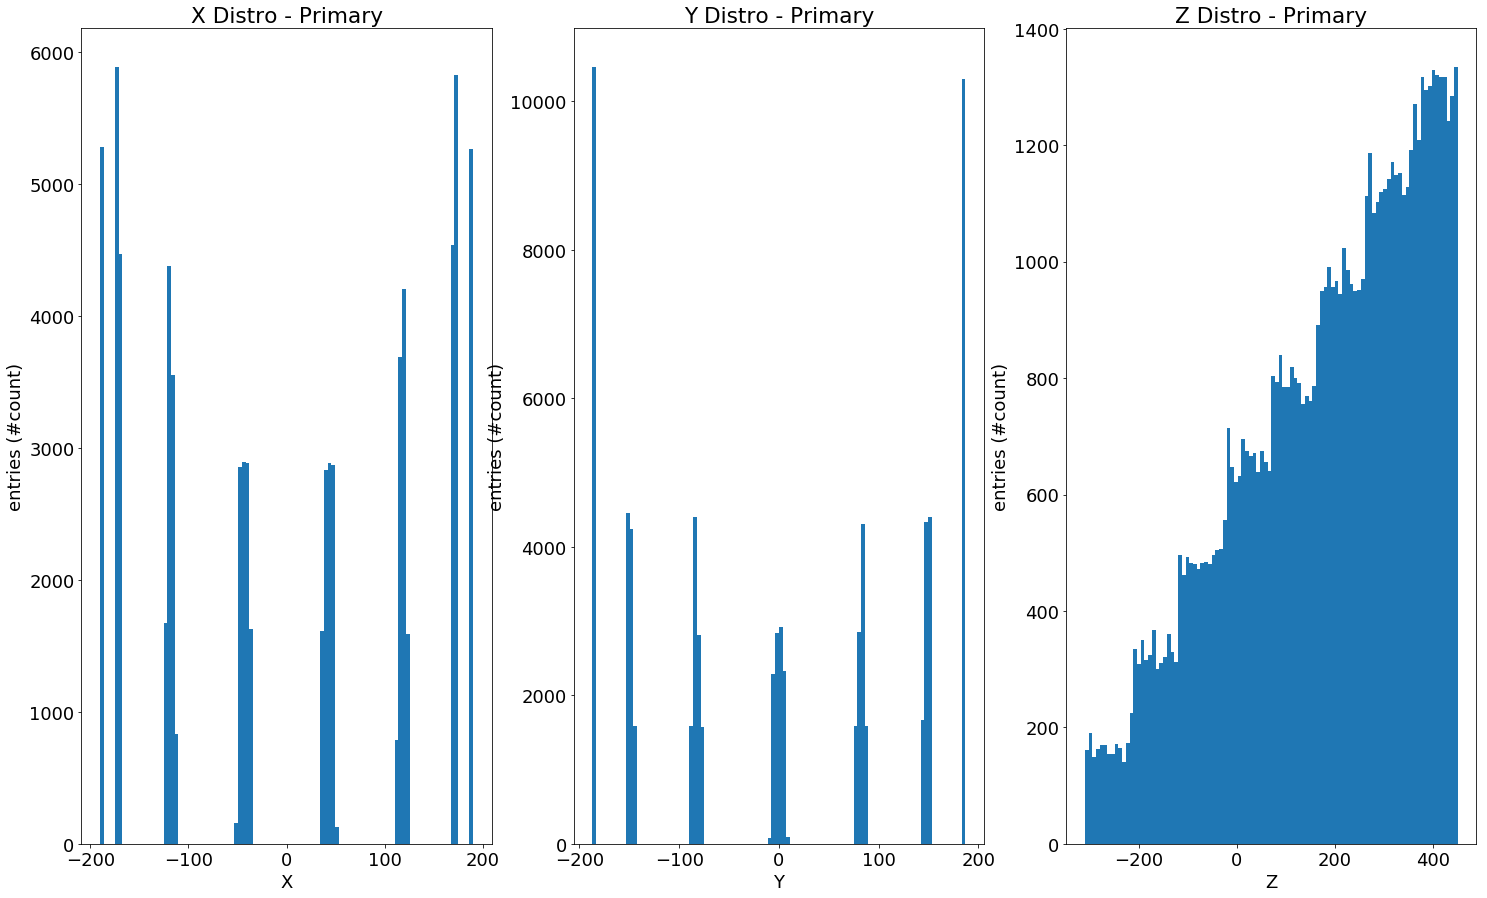

                  x             y             z
count  72751.000000  72751.000000  72751.000000
mean      -0.348733     -0.173693    180.377745
std      134.523554    134.234826    189.872008
min     -190.100000   -186.999000   -309.871000
25%     -121.374000   -146.240000     43.890150
50%      -35.028900      0.002545    212.793000
75%      121.361000    146.232000    341.503000
max      190.100000    186.999000    449.989000


In [9]:
primary_xyz = df[["x", "y", "z", "time", "eventnumber"]].sort_values("time").groupby("eventnumber").first()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
nbins = 100
ax1.hist(primary_xyz.x, nbins, label='X')
ax2.hist(primary_xyz.y, nbins, label='Y')
ax3.hist(primary_xyz.z, nbins, label='Z')
ax1.set_title("X Distro - Primary")
ax2.set_title("Y Distro - Primary")
ax3.set_title("Z Distro - Primary")
ax1.set_xlabel("X")
ax2.set_xlabel("Y")
ax3.set_xlabel("Z")
ax1.set_ylabel("entries (#count)")
ax2.set_ylabel("entries (#count)")
ax3.set_ylabel("entries (#count)")
plt.show()

print(primary_xyz[["x", "y", "z"]].describe())
del primary_xyz

**Observations**
- all the coordinates are sampled in a bounded region around the origin (+/- 200)
- x, y distributions are weird: they seem some sort of discrete sampling.